**KMeans Clustering** \
Adhitya Aldira Hardy \
1301184036\
IF-42-04

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as r
import copy
import math
from sklearn.preprocessing import MinMaxScaler

### **Read Data** 

In [ ]:
df_test = pd.read_csv('salju_test.csv')
df_train = pd.read_csv('salju_train.csv')
df = pd.concat([df_test,df_train], ignore_index=True)
df.head

<bound method NDFrame.head of            Tanggal KodeLokasi  SuhuMin  ...  BersaljuHariIni  BersaljuBesok        id
0       04/11/2010        C39     11.0  ...               No             No       NaN
1       26/03/2015        C35     10.0  ...               No            Yes       NaN
2       22/03/2016        C18      9.2  ...               No             No       NaN
3       09/12/2011        C31     17.7  ...               No             No       NaN
4       20/05/2017        C14      2.3  ...              Yes             No       NaN
...            ...        ...      ...  ...              ...            ...       ...
127272  31/01/2009        C38     20.1  ...            Tidak             Ya  109091.0
127273  03/11/2010        C16     15.7  ...            Tidak             Ya  109092.0
127274  11/11/2010        C17      7.5  ...               Ya          Tidak  109093.0
127275  16/04/2012        C11     10.8  ...            Tidak          Tidak  109094.0
127276  09/10/2011      

In [ ]:
df.isna().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
BersaljuHariIni              2818
BersaljuBesok                2850
id                          18182
dtype: int64

### **Impute Missing Value**

In [ ]:
df.fillna(df.median(), inplace=True) 
df = df.fillna(df.mode().iloc[0])
df.head

<bound method NDFrame.head of            Tanggal KodeLokasi  SuhuMin  ...  BersaljuHariIni  BersaljuBesok        id
0       04/11/2010        C39     11.0  ...               No             No   54548.0
1       26/03/2015        C35     10.0  ...               No            Yes   54548.0
2       22/03/2016        C18      9.2  ...               No             No   54548.0
3       09/12/2011        C31     17.7  ...               No             No   54548.0
4       20/05/2017        C14      2.3  ...              Yes             No   54548.0
...            ...        ...      ...  ...              ...            ...       ...
127272  31/01/2009        C38     20.1  ...            Tidak             Ya  109091.0
127273  03/11/2010        C16     15.7  ...            Tidak             Ya  109092.0
127274  11/11/2010        C17      7.5  ...               Ya          Tidak  109093.0
127275  16/04/2012        C11     10.8  ...            Tidak          Tidak  109094.0
127276  09/10/2011      

In [ ]:
#melakukan pengecekan missing value
df.isna().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
id                          0
dtype: int64

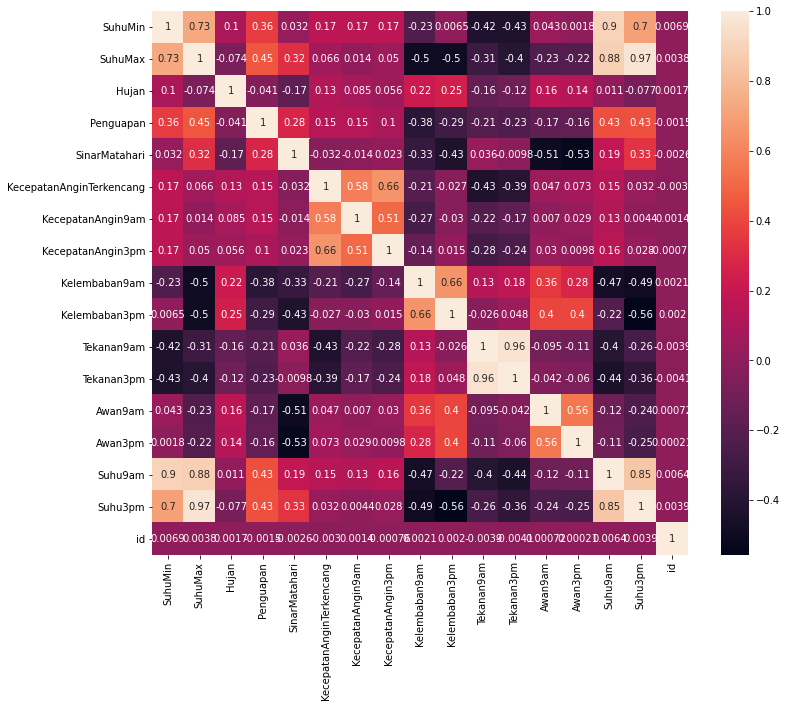

In [ ]:
#melakukan observasi korelasi antar atribut
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot =True)

In [ ]:
#mengambil data yang akan digunakan untuk diolah
data = pd.DataFrame(columns = ['Suhu9am', 'Suhu3pm'])
data['Suhu9am'] = df['Suhu9am']
data['Suhu3pm'] = df['Suhu3pm']
data.head

<bound method NDFrame.head of         Suhu9am  Suhu3pm
0          25.7     23.6
1          10.7     18.9
2          13.9     26.3
3          22.3     26.4
4           4.4      6.0
...         ...      ...
127272     22.0     22.1
127273     23.8     24.4
127274     12.6     19.8
127275     21.7     29.2
127276     20.4     23.3

[127277 rows x 2 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    127277.000000
mean         16.995944
std           6.444586
min          -7.200000
25%          12.400000
50%          16.700000
75%          21.500000
max          40.200000
Name: Suhu9am, dtype: float64

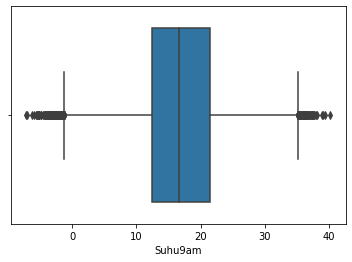

In [ ]:
#mengecek data outlier
sns.boxplot(data['Suhu9am'])
data['Suhu9am'].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    127277.000000
mean         21.672807
std           6.845398
min          -5.400000
25%          16.700000
50%          21.100000
75%          26.200000
max          46.700000
Name: Suhu3pm, dtype: float64

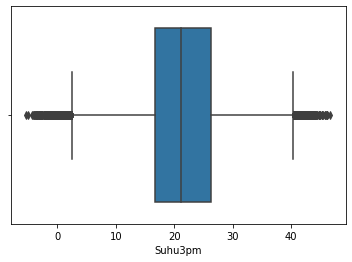

In [ ]:
#mengecek data outlier
sns.boxplot(data['Suhu3pm'])
data['Suhu3pm'].describe()

In [ ]:
#menghilangkan hasil outlier
Q1=data.quantile(0.25) 
Q3=data.quantile(0.75)
IQR = Q3 - Q1
df_cluster = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cluster

,Suhu9am,Suhu3pm
0,25.7,23.6
1,10.7,18.9
2,13.9,26.3
3,22.3,26.4
4,4.4,6.0
...,...,...
127272,22.0,22.1
127273,23.8,24.4
127274,12.6,19.8
127275,21.7,29.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    126323.000000
mean         16.989860
std           6.313631
min          -1.200000
25%          12.400000
50%          16.700000
75%          21.500000
max          35.100000
Name: Suhu9am, dtype: float64

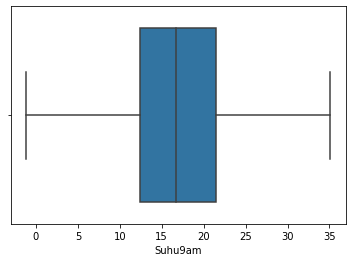

In [ ]:
#mengecek data outlier
sns.boxplot(df_cluster['Suhu9am'])
df_cluster['Suhu9am'].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    126323.000000
mean         21.663306
std           6.639868
min           2.500000
25%          16.800000
50%          21.100000
75%          26.200000
max          40.400000
Name: Suhu3pm, dtype: float64

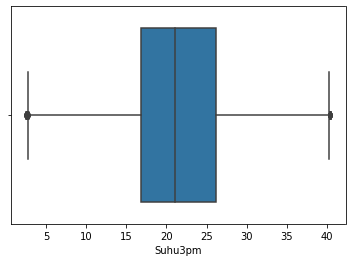

In [ ]:
#mengecek data outlier
sns.boxplot(df_cluster['Suhu3pm'])
df_cluster['Suhu3pm'].describe()

In [ ]:
#melakuan scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[0.69409283 0.55662188]
 [0.37763713 0.46641075]
 [0.44514768 0.6084453 ]
 ...
 [0.41772152 0.48368522]
 [0.60970464 0.66410749]
 [0.58227848 0.55086372]]


In [ ]:
#mengambil data setelah melakukan scaling
df_cluster.data = pd.DataFrame(scaled,columns=['Suhu9am','Suhu3pm'])
df_cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Suhu9am,Suhu3pm
0,25.7,23.6
1,10.7,18.9
2,13.9,26.3
3,22.3,26.4
4,4.4,6.0
...,...,...
127272,22.0,22.1
127273,23.8,24.4
127274,12.6,19.8
127275,21.7,29.2


Text(0.5, 1.0, 'Plot Data Belum Clastering')

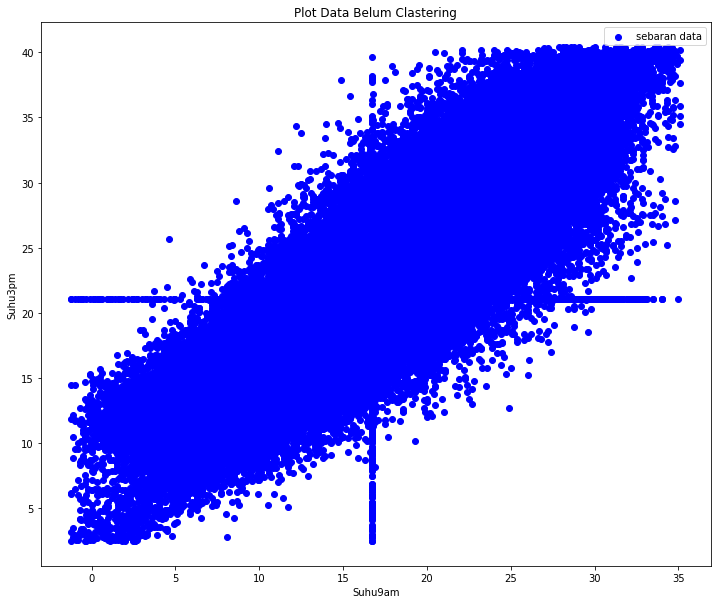

In [ ]:
#visualisasi data sebelum dicluster
plt.figure(figsize=(12,10))
plt.scatter(df_cluster['Suhu9am'],df_cluster['Suhu3pm'],c='blue',label='sebaran data')
plt.xlabel('Suhu9am')
plt.ylabel('Suhu3pm')
plt.legend()
plt.title('Plot Data Belum Clastering')

In [ ]:
#menghitung jarak data dengan current centroid
x = df_cluster.values
def euclidean_distance(x,center):
    return math.sqrt(sum([(a-b)**2 for a,b in zip(x, center)]))
x

array([[25.7, 23.6],
       [10.7, 18.9],
       [13.9, 26.3],
       ...,
       [12.6, 19.8],
       [21.7, 29.2],
       [20.4, 23.3]])

In [ ]:
def KMeans(K):
    current_centroid = [[0 for x in range(len(x[0]))] for y in range(K)]
    #menentukan nilai centroid
    for i in range(K):
        idx = r.randint(0,126323)
        for j in range(len(x[idx])):
            current_centroid[i][j] = x[idx][j]
    
    #menginisiasi prev centroid
    prev_centroid = [None]
    while (prev_centroid != current_centroid):    
        cluster = [0 for x in range(K)]
        c_result = [0 for x in range(len(x))]
        sum_c = [[0 for x in range(len(x[0]))] for y in range(K)]
        i_c = [0 for x in range(K)]

        temp = copy.deepcopy(prev_centroid)
        for i in range(len(x)):
            for j in range(K):
                #menghitung euclidean distance
                cluster[j] = euclidean_distance(x[i], current_centroid[j])
            #mendapatkan hasil cluster
            c_result[i] = cluster.index(min(cluster))

            for j in range(K):
                if (c_result[i] == j):
                    i_c[j] += 1
                    for k in range(len(x[0])): 
                        sum_c[j][k] += x[i][k]

        prev_centroid = copy.deepcopy(current_centroid)
        for j in range(K):
            if (i_c[j] != 0):
                for k in range(len(x[0])):
                  #mengupdate centroid baru
                  current_centroid[j][k] = sum_c[j][k]/i_c[j]
    dist = [] 
    for i in range(len(x)):
        for j in range(K):
            if (c_result[i] == j):
              #mencari euclidean distance antara objek dengan centroid
              dist.append(euclidean_distance(x[i], current_centroid[j]))
    return c_result, dist, current_centroid

In [ ]:
#untuk elbow method
SSE = []
#menghitung nilai K dari 1 sampai 7
for num_K in range(1,8):
    print("K = ", num_K)
    result, dist, centroids = KMeans(num_K)
    SSE.append(sum(pow(i, 2) for i in dist))
    print("SSE = ", SSE[num_K-1],"\n")

K =  1
SSE =  10604704.58398967 

K =  2
SSE =  4012009.8632476376 

K =  3
SSE =  2408652.381359232 

K =  4
SSE =  1783230.8643738586 

K =  5
SSE =  1568542.4208745593 

K =  6
SSE =  1304892.8953970282 

K =  7
SSE =  1137005.515236049 



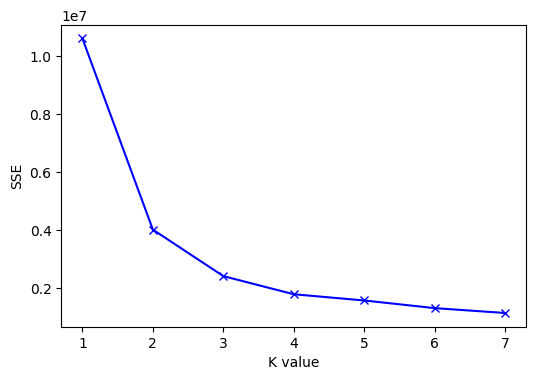

In [ ]:
#melakukan plot untuk melihat elbow method
K = range(1,8)
plt.rcParams['figure.dpi'] = 100
plt.plot(K, SSE, 'bx-')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show()

In [ ]:
# memasukan nilai K maksimum yang di dapatkan dari elbow method
result, dist, centroid = KMeans(2)

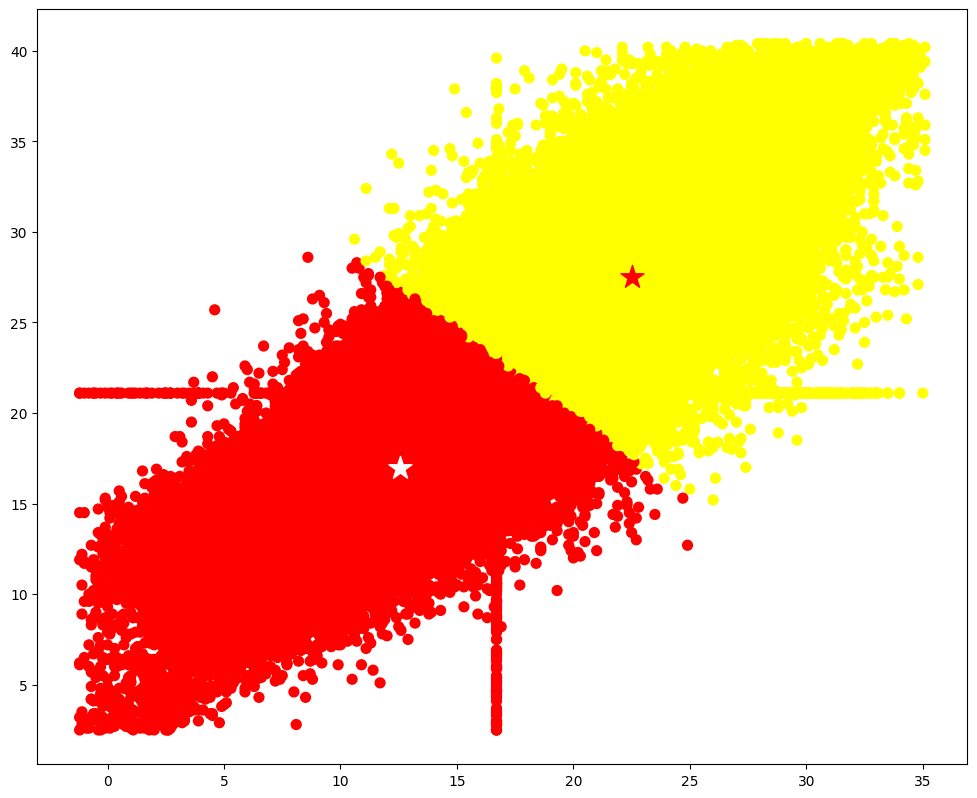

In [ ]:
#ploting clustering
plt.figure(figsize=(12,10))
plt.scatter(x[:,0], x[:,1], c=result,
            s=50, cmap='autumn')
plt.scatter(centroid[0][0], centroid[0][1], marker='*', s=300,
            c='white', label='centroid')
plt.scatter(centroid[1][0], centroid[1][1], marker='*', s=300,
            c='red', label='centroid')

In [ ]:
df.to_csv('1301184036_Adhitya Aldira Hardy_dataset.csv', index=False)

NameError: ignored